In [59]:
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pandas as pd

import glob, os

#To serialize and save the models after training them for the first time, then load them from memory afterwards to save time
from joblib import dump, load
#import dill 

## Load and parse the data downloaded from Etsy and preselected-cleaned in the 'data_downloading' notebook


In [2]:
csv_filename_pattern = f'./Git_exclude/Data/all_paintings*.csv'

all_paintings_csv_files = glob.glob(csv_filename_pattern)
all_paintings_csv_files

['./Git_exclude/Data\\all_paintings_from_USD250_cleaned_listings.csv',
 './Git_exclude/Data\\all_paintings_from_USD250_listings_with_style_and_image_info.csv',
 './Git_exclude/Data\\all_paintings_from_USD250_listings_with_style_tags.csv']

In [3]:
# #Option 1: load all paintings in the $250-650 range, even if they don't have style and image information (~50000 entries)

# min_price = 250.0

# csv_all_cleaned_listings = f'./Git_exclude/Data/all_paintings_from_USD{int(min_price)}_cleaned_listings.csv'

# all_paintings_df = pd.read_csv(csv_all_cleaned_listings)

# print(f'Loaded listings file {csv_all_cleaned_listings} with all the cleaned listings (multiple taxonomies, with or without style data).')

In [4]:
#Option 2: load only the paintings in the $250-650 range that have style information (~20000 entries)

# min_price = 250.0

# csv_all_cleaned_listings_w_style = f'./Git_exclude/Data/all_paintings_from_USD{int(min_price)}_listings_with_style_tags.csv'
# paintings_with_style_tags_df = pd.read_csv(csv_all_cleaned_listings_w_style)
# print(f'Loaded all listings file {csv_all_cleaned_listings_w_style} with some style-related tags, after cleaning up the data.')

In [5]:
#Option 3: load only the paintings in the $250-650 range that have style and also some image information (~20000 entries, just ~300 fewer than option 2)

min_price = 250.0

csv_combined_filename_w_style_n_image_info = f'./Git_exclude/Data/all_paintings_from_USD{int(min_price)}_listings_with_style_and_image_info.csv'
paintings_with_style_tags_and_image_info_df = pd.read_csv(csv_combined_filename_w_style_n_image_info)
print(f'Loaded all listings file {csv_combined_filename_w_style_n_image_info} with style-related tags and some image info, after cleaning up the data.')


Loaded all listings file ./Git_exclude/Data/all_paintings_from_USD250_listings_with_style_and_image_info.csv with style-related tags and some image info, after cleaning up the data.


In [6]:
paintings_with_style_tags_and_image_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19459 entries, 0 to 19458
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   19459 non-null  int64  
 1   user_id                      19459 non-null  int64  
 2   shop_id                      19459 non-null  int64  
 3   title                        19459 non-null  object 
 4   description                  19459 non-null  object 
 5   shop_section_id              12972 non-null  float64
 6   featured_rank                19459 non-null  int64  
 7   url                          19459 non-null  object 
 8   num_favorers                 19459 non-null  int64  
 9   is_customizable              19459 non-null  bool   
 10  tags                         19459 non-null  object 
 11  materials                    19459 non-null  object 
 12  shipping_profile_id          13401 non-null  float64
 13  when_made       

Keep the labels to be predicted, in this case the prices, in a separate data structure than the features. 

In [7]:
prices = paintings_with_style_tags_and_image_info_df['price'].values

In [8]:
len(prices)

19459

In [20]:
#Note that this is a numpy array rather than a list (as in the ML miniproject) but it should be ok
prices[:5]

array([250., 250., 250., 250., 250.])

# Models


### Set aside 20% of the data for testing the model at the end - this also shuffles the dataframe as a bonus

In [21]:
from sklearn.model_selection import train_test_split

paintings_df_train, paintings_df_test = train_test_split(paintings_with_style_tags_and_image_info_df, test_size=0.2, random_state=1)

In [22]:
len(paintings_df_test)

3892

In [23]:
len(paintings_df_train)

15567

In [24]:
paintings_df_train.head()

,listing_id,user_id,shop_id,title,description,shop_section_id,featured_rank,url,num_favorers,is_customizable,...,image_brightness,image_is_black_and_white,image_creation_tsz,image_rank,image_url_75x75,image_url_170x135,image_url_570xN,image_url_fullxfull,image_full_height,image_full_width
4930,764408086,13034808,8946559,Granny Art Vintage Muted water scene on light ...,Vintage Muted seascape water scene on light oa...,17504291.0,-1,https://www.etsy.com/listing/764408086/granny-...,13,False,...,45.0,False,1581521804,1,https://i.etsystatic.com/8946559/r/il/3dd33f/2...,https://i.etsystatic.com/8946559/r/il/3dd33f/2...,https://i.etsystatic.com/8946559/r/il/3dd33f/2...,https://i.etsystatic.com/8946559/r/il/3dd33f/2...,1240,1360
8561,838240660,348464339,24594447,Jazz Saxophone Abstract 24x18 Original Oil Pai...,This unique original oil painting was inspired...,29940187.0,-1,https://www.etsy.com/listing/838240660/jazz-sa...,0,False,...,56.0,False,1615942394,1,https://i.etsystatic.com/24594447/r/il/e67e5e/...,https://i.etsystatic.com/24594447/r/il/e67e5e/...,https://i.etsystatic.com/24594447/r/il/e67e5e/...,https://i.etsystatic.com/24594447/r/il/e67e5e/...,1507,1500
3516,692697340,63771712,19532572,Yosemite Half Dome with Ariel the Airstream,Our Airstream parked in one of my favorite and...,NaN,0,https://www.etsy.com/listing/692697340/yosemit...,5,False,...,40.0,False,1586474349,1,https://i.etsystatic.com/19532572/r/il/c6d0e8/...,https://i.etsystatic.com/19532572/r/il/c6d0e8/...,https://i.etsystatic.com/19532572/r/il/c6d0e8/...,https://i.etsystatic.com/19532572/r/il/c6d0e8/...,3000,2250
5679,616076710,9358682,5817337,"Lemon Painting, Original Oil Artwork, Still Li...",Original oil painting on a square 10 x 10 inch...,6861999.0,-1,https://www.etsy.com/listing/616076710/lemon-p...,35,False,...,60.0,False,1532024416,1,https://i.etsystatic.com/5817337/r/il/a3bb67/1...,https://i.etsystatic.com/5817337/r/il/a3bb67/1...,https://i.etsystatic.com/5817337/r/il/a3bb67/1...,https://i.etsystatic.com/5817337/r/il/a3bb67/1...,1000,1000
16632,658664886,59410411,10475229,Beyond In Love,"Beyond In Love\n\nWatercolor, Gouache and Ink ...",23281398.0,-1,https://www.etsy.com/listing/658664886/beyond-...,7,True,...,53.0,False,1633897841,1,https://i.etsystatic.com/10475229/r/il/c2ce0b/...,https://i.etsystatic.com/10475229/r/il/c2ce0b/...,https://i.etsystatic.com/10475229/r/il/c2ce0b/...,https://i.etsystatic.com/10475229/r/il/c2ce0b/...,1814,2610


In [26]:
paintings_df_test.head()

,listing_id,user_id,shop_id,title,description,shop_section_id,featured_rank,url,num_favorers,is_customizable,...,image_brightness,image_is_black_and_white,image_creation_tsz,image_rank,image_url_75x75,image_url_170x135,image_url_570xN,image_url_fullxfull,image_full_height,image_full_width
14269,1020376182,7171595,30323084,Moose Family,"Springtime in Steamboat Springs, Colorado offe...",NaN,-1,https://www.etsy.com/listing/1020376182/moose-...,0,False,...,45.0,False,1628794732,1,https://i.etsystatic.com/30323084/c/1500/1192/...,https://i.etsystatic.com/30323084/c/1500/1192/...,https://i.etsystatic.com/30323084/r/il/83860f/...,https://i.etsystatic.com/30323084/r/il/83860f/...,2499,3000
16952,564549959,107586113,16213887,Acrylic painting- Mystery woman with red lips,Acrylic painting.\n\nDETAILS:\n\n* TITLE: &quo...,NaN,-1,https://www.etsy.com/listing/564549959/acrylic...,1,False,...,49.0,False,1507916923,1,https://i.etsystatic.com/16213887/r/il/451e2c/...,https://i.etsystatic.com/16213887/r/il/451e2c/...,https://i.etsystatic.com/16213887/r/il/451e2c/...,https://i.etsystatic.com/16213887/r/il/451e2c/...,2250,3000
9759,1033593766,116323951,15411704,Early Mid Century California Plein Air Tide Po...,Frame 17 3/4 x 14 3/4&quot;\nMasonite : 11 x 1...,28276743.0,279,https://www.etsy.com/listing/1033593766/early-...,7,False,...,53.0,False,1625620520,1,https://i.etsystatic.com/15411704/r/il/eeeb02/...,https://i.etsystatic.com/15411704/r/il/eeeb02/...,https://i.etsystatic.com/15411704/r/il/eeeb02/...,https://i.etsystatic.com/15411704/r/il/eeeb02/...,2250,3000
620,685627441,116419745,15473440,Binary,"This piece is titled, &quot;Binary&quot;. It i...",25715334.0,-1,https://www.etsy.com/listing/685627441/binary,3,False,...,43.0,False,1629945422,1,https://i.etsystatic.com/15473440/r/il/e5f21d/...,https://i.etsystatic.com/15473440/r/il/e5f21d/...,https://i.etsystatic.com/15473440/r/il/e5f21d/...,https://i.etsystatic.com/15473440/r/il/e5f21d/...,606,675
11395,953792299,20295098,8628312,Du Barry Fashion Studios (active 1940s to 1960s),DU BARRY FASHION STUDIOS (active 1940s to 1960s),NaN,-1,https://www.etsy.com/listing/953792299/du-barr...,0,False,...,58.0,False,1612122913,1,https://i.etsystatic.com/8628312/r/il/f16236/2...,https://i.etsystatic.com/8628312/r/il/f16236/2...,https://i.etsystatic.com/8628312/r/il/f16236/2...,https://i.etsystatic.com/8628312/r/il/f16236/2...,2992,2244


In [27]:
paintings_df_test.index[:5]

Int64Index([14269, 16952, 9759, 620, 11395], dtype='int64')

In [28]:
#Make sure the test set has all 4 painting types represented
paintings_df_test['painting_type'].value_counts()

acrylic          1698
oil              1479
watercolor        447
more_than_one     268
Name: painting_type, dtype: int64

In [30]:
paintings_df_train['painting_type'].value_counts()

acrylic          6747
oil              6014
watercolor       1674
more_than_one    1132
Name: painting_type, dtype: int64

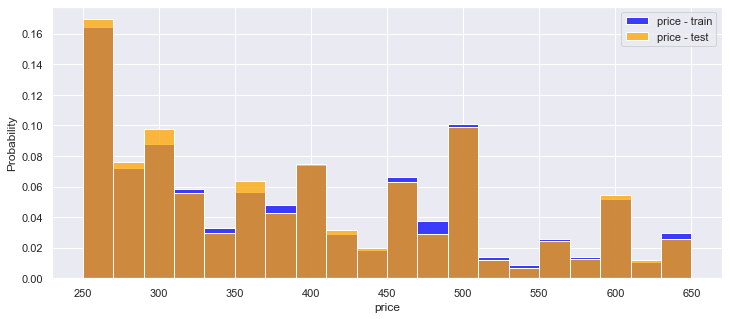

In [44]:
#check that the price distribution is also consistent:
plt.figure(figsize=(12,5))
sns.histplot(data=paintings_df_train,x='price',stat='probability',bins=20,color='blue')
sns.histplot(data=paintings_df_test,x='price',stat='probability',bins=20,color='orange')
#paintings_df_train['price'].plot(kind='hist')
#paintings_df_test['price'].plot(kind='hist')
plt.legend(['price - train','price - test'])

In [45]:
#I need to also rearrange the 'prices' numpy array, so that I can later trace back the corresponding rows in the dataframe
prices_train = prices[paintings_df_train.index]
prices_test = prices[paintings_df_test.index]

In [47]:
len(prices_train)

15567

In [48]:
#sanity check
prices_train[:5]

array([295., 350., 275., 300., 525.])

In [49]:
paintings_df_train['price'].iloc[:5]

4930     295.0
8561     350.0
3516     275.0
5679     300.0
16632    525.0
Name: price, dtype: float64

In [52]:
#sanity check
prices_test[-5:]

array([295.  , 399.99, 450.  , 275.  , 500.  ])

In [53]:
paintings_df_test['price'].iloc[-5:]

5056     295.00
10907    399.99
13123    450.00
3946     275.00
15285    500.00
Name: price, dtype: float64

### Feature types

In [91]:
#Let's divide the columns (features) into different groups, as I will test different models with different combinations of features
numerical_columns = ['num_favorers','featured_rank','max_dimension','aspect_ratio','area','weight','days_from_original_creation','days_from_last_modification'] 

categorical_columns = ['painting_type','when_made','made_by_seller','is_customizable','has_variations']

text_columns = ['style_tags_new','tags','materials']

image_columns = ['image_red','image_green','image_blue','image_hue','image_saturation','image_brightness']


### Baseline results picking the mean price of the paintings in the training set as my predictions

In [102]:
trivial_price_pred_train = np.ones(len(prices_train)) * np.mean(prices_train)

In [103]:
trivial_price_pred_test = np.ones(len(prices_test)) * np.mean(prices_train)

In [124]:
from sklearn import metrics

def print_all_scores_train_test(y_train,y_train_pred,y_test,y_test_pred,model_name='Results'):
    print(model_name+':')
    print("Training R^2:", metrics.r2_score(y_train, y_train_pred))
    print("Testing R^2:", metrics.r2_score(y_test, y_test_pred))
    print("Training RMSE: USD", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
    print("Testing RMSE: USD", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
    print("Training MAE: USD", metrics.mean_absolute_error(y_train, y_train_pred))
    print("Testing MAE: USD", metrics.mean_absolute_error(y_test, y_test_pred))

print_all_scores_train_test(prices_train,trivial_price_pred_train,prices_test,trivial_price_pred_test,model_name='Trivial model using the mean price of the training set paintings')

Trivial model using the mean price of the training set paintings:
Training R^2: 0.0
Testing R^2: -0.0011129435654106956
Training RMSE: USD 115.65203927194021
Testing RMSE: USD 115.5684146996469
Training MAE: USD 98.77566847195826
Testing MAE: USD 98.81188688275215


## 1) Models using only numerical features

To select only the numerical features, I use scikit-learn's [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), which works with Pandas data frames (or alternatively with NumPy arrays).

I will scale each of the numerical variables using a StandardScaler so they are all comparable to each other

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler #, MinMaxScaler

#I could select and scale at the same time:
numerical_scaler_selector = ColumnTransformer([
    ('numerical scaled (std)', StandardScaler(), numerical_columns),
], remainder='drop')

In [66]:
#Let's test it out - note that it returns a numpy array, with mean equal to zero :
test = numerical_scaler_selector.fit_transform(paintings_with_style_tags_and_image_info_df)

In [67]:
test[0]

array([ 0.58513566, -0.10930993,  0.41210228, -0.35295979,  0.89841081,
        0.27424499,  5.09195353,  0.0992361 ])

In [68]:
np.mean(test,axis=0)

array([-9.49386460e-18, -1.46059455e-18, -3.62227449e-16,  1.33279253e-17,
        1.16847564e-16, -7.59509168e-17,  1.82574319e-17,  3.89978746e-16])

In [69]:
np.std(test,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [70]:
#But it's probably cleaner to keep the selector and the scaling separately, e.g. 
numerical_selector = ColumnTransformer([
    ('numerical', 'passthrough', numerical_columns),
], remainder='drop')

In [71]:
#and then do the scaling of part of a Pipeline, e.g.
from sklearn.pipeline import Pipeline

numerical_preproc_pipe = Pipeline([
    ('numerical selector', numerical_selector),
    ('standard scaling', StandardScaler()),
])

In [72]:
#Let's check that I get the same results as before:
test2 = numerical_preproc_pipe.fit_transform(paintings_with_style_tags_and_image_info_df)

In [73]:
test2[0]

array([ 0.58513566, -0.10930993,  0.41210228, -0.35295979,  0.89841081,
        0.27424499,  5.09195353,  0.0992361 ])

### Model 1a) Linear regression using only numerical features

In [74]:
#This is a good start since it has no parameters to fit, and the solution should be really fast to compute (no cross-validation, etc.)
from sklearn.linear_model import LinearRegression

numerical_linreg_pipe = Pipeline([('numerical preproc', numerical_preproc_pipe),
                      ('linear reg', LinearRegression())])

In [75]:
#Let's visualize this pipeline:
from sklearn import set_config
set_config(display='diagram')

numerical_linreg_pipe

Pipeline(steps=[('numerical preproc',
                 Pipeline(steps=[('numerical selector',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   'passthrough',
                                                                   ['num_favorers',
                                                                    'featured_rank',
                                                                    'max_dimension',
                                                                    'aspect_ratio',
                                                                    'area',
                                                                    'weight',
                                                                    'days_from_original_creation',
                                                                    'days_from_last_modification'])])),
                                 ('standard scaling', StandardScaler())])),
                ('linear reg', LinearRegression())])

In [126]:
#Train the model
numerical_linreg_pipe.fit(paintings_df_train,prices_train);

In [127]:
#Predict prices on training set:
prices_train_pred = numerical_linreg_pipe.predict(paintings_df_train)

In [128]:
#And return the R2 score as follows:
numerical_linreg_pipe.score(paintings_df_train,prices_train)

0.06578759944869916

In [129]:
#Predict prices on test set:
prices_test_pred = numerical_linreg_pipe.predict(paintings_df_test)

In [130]:
#And return the R2 score as follows:
numerical_linreg_pipe.score(paintings_df_test,prices_test)

0.0788971295497991

In [131]:
#Print results, using the function defined earlier:

print_all_scores_train_test(prices_train,prices_train_pred,prices_test,prices_test_pred,model_name='Linear regression model using only numerical features')

#Note that I am not overfitting the training data, since the model actually does better on test data

Linear regression model using only numerical features:
Training R^2: 0.06578759944869916
Testing R^2: 0.0788971295497991
Training RMSE: USD 111.78308956396623
Testing RMSE: USD 110.85408089777948
Training MAE: USD 94.86939480487499
Testing MAE: USD 94.18784831024173


Text(0, 0.5, 'predicted prices (test)')

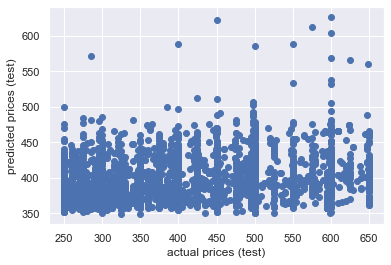

In [107]:
plt.scatter(prices_test,prices_test_pred)
plt.xlabel('actual prices (test)')
plt.ylabel('predicted prices (test)')

C:\Users\matte\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


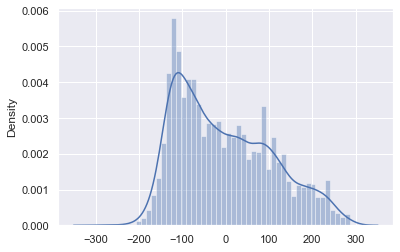

In [108]:
#Plot residuals:
sns.distplot((prices_test-prices_test_pred),bins=50);

In [114]:
#Let's look at the coefficients of the model
# intercept
print(numerical_linreg_pipe['linear reg'].intercept_)

394.353173379585


In [115]:
#coefficients for each variable:
coeff_df = pd.DataFrame(numerical_linreg_pipe['linear reg'].coef_,numerical_columns,columns=['Lin Reg Coeff'])
coeff_df

,Lin Reg Coeff
num_favorers,1.554021
featured_rank,2.069825
max_dimension,0.122143
aspect_ratio,12.318451
area,23.225107
weight,8.439767
days_from_original_creation,-0.335826
days_from_last_modification,1.729450


In [116]:
#looks like area and aspect_ratio are the most informative numerical variables

### Model 1b) Polynomial regression using only numerical features

In [118]:
from sklearn.preprocessing import PolynomialFeatures

numerical_polyreg_pipe = Pipeline([('numerical preproc', numerical_preproc_pipe),
                      ('polynomial_trans', PolynomialFeatures(degree=3,include_bias=False)),            
                      ('linear reg', LinearRegression())])

In [120]:
#Train the model
numerical_polyreg_pipe.fit(paintings_df_train,prices_train)

Pipeline(steps=[('numerical preproc',
                 Pipeline(steps=[('numerical selector',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   'passthrough',
                                                                   ['num_favorers',
                                                                    'featured_rank',
                                                                    'max_dimension',
                                                                    'aspect_ratio',
                                                                    'area',
                                                                    'weight',
                                                                    'days_from_original_creation',
                                                                    'days_from_last_modification'])])),
                                 ('standard scaling', StandardScaler())])),
                ('polynomial_trans',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linear reg', LinearRegression())])

In [121]:
#Predict prices on training set:
prices_train_pred = numerical_polyreg_pipe.predict(paintings_df_train)
#And return the R2 score as follows:
numerical_polyreg_pipe.score(paintings_df_train,prices_train)

0.0983159678208011

In [122]:
#Predict prices on test set:
prices_test_pred = numerical_polyreg_pipe.predict(paintings_df_test)
#And return the R2 score as follows:
numerical_polyreg_pipe.score(paintings_df_test,prices_test)

0.04567696996191417

In [125]:
#Print results using the function defined earlier:

print_all_scores_train_test(prices_train,prices_train_pred,prices_test,prices_test_pred,model_name='Polynomial regression model using only numerical features')


Polynomial regression model using only numerical features:
Training R^2: 0.0983159678208011
Testing R^2: 0.04567696996191417
Training RMSE: USD 109.81975852825491
Testing RMSE: USD 112.83538625949616
Training MAE: USD 92.06916866633601
Testing MAE: USD 93.17433793546634


In [ ]:
#It looks like I am already overfitting the training data, so let's try to replace the linear regression with a ridge regression or LASSO model

In [133]:
from sklearn.linear_model import Ridge

numerical_polyreg_ridge_pipe = Pipeline([('numerical preproc', numerical_preproc_pipe),
                      ('polynomial_trans', PolynomialFeatures(degree=3,include_bias=False)),            
                      ('ridge', Ridge(alpha=10))])

numerical_polyreg_ridge_pipe

Pipeline(steps=[('numerical preproc',
                 Pipeline(steps=[('numerical selector',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   'passthrough',
                                                                   ['num_favorers',
                                                                    'featured_rank',
                                                                    'max_dimension',
                                                                    'aspect_ratio',
                                                                    'area',
                                                                    'weight',
                                                                    'days_from_original_creation',
                                                                    'days_from_last_modification'])])),
                                 ('standard scaling', StandardScaler())])),
                ('polynomial_trans',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ridge', Ridge(alpha=10))])

In [134]:
numerical_polyreg_ridge_pipe.get_params()

{'memory': None,
 'steps': [('numerical preproc',
   Pipeline(steps=[('numerical selector',
                    ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                     ['num_favorers',
                                                      'featured_rank',
                                                      'max_dimension',
                                                      'aspect_ratio', 'area',
                                                      'weight',
                                                      'days_from_original_creation',
                                                      'days_from_last_modification'])])),
                   ('standard scaling', StandardScaler())])),
  ('polynomial_trans', PolynomialFeatures(degree=3, include_bias=False)),
  ('ridge', Ridge(alpha=10))],
 'verbose': False,
 'numerical preproc': Pipeline(steps=[('numerical selector',
                  ColumnTransformer(transformers=[(

In [145]:
from sklearn.model_selection import GridSearchCV

#I will then need to search for the right alpha using Cross Validation:
#Let's do a cross validation as before and see how well does this model perform:
param_grid = {'ridge__alpha': np.logspace(0,8,20)} 
numerical_polyreg_ridge_CVmodel = GridSearchCV(numerical_polyreg_ridge_pipe, param_grid, cv=5, n_jobs=2, verbose=1)

In [146]:
numerical_polyreg_ridge_CVmodel.fit(paintings_df_train,prices_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   11.8s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('numerical preproc',
                                        Pipeline(steps=[('numerical selector',
                                                         ColumnTransformer(transformers=[('numerical',
                                                                                          'passthrough',
                                                                                          ['num_favorers',
                                                                                           'featured_rank',
                                                                                           'max_dimension',
                                                                                           'aspect_ratio',
                                                                                           'area',
                                                                                           'weight',
                                                                                           'days_from_original_creation',
                                                                                           'days_from_last_modification'])])),
                                                        ('standard scaling',
                                                         StandardScaler())])),
                                       ('poly...
             n_jobs=2,
             param_grid={'ridge__alpha': array([1.00000000e+00, 2.63665090e+00, 6.95192796e+00, 1.83298071e+01,
       4.83293024e+01, 1.27427499e+02, 3.35981829e+02, 8.85866790e+02,
       2.33572147e+03, 6.15848211e+03, 1.62377674e+04, 4.28133240e+04,
       1.12883789e+05, 2.97635144e+05, 7.84759970e+05, 2.06913808e+06,
       5.45559478e+06, 1.43844989e+07, 3.79269019e+07, 1.00000000e+08])},
             verbose=1)

In [147]:
numerical_polyreg_ridge_CVmodel.best_params_

{'ridge__alpha': 112883.78916846884}

In [148]:
#Predict prices on training set:
prices_train_pred = numerical_polyreg_ridge_CVmodel.predict(paintings_df_train)
#And return the R2 score as follows:
numerical_polyreg_ridge_CVmodel.score(paintings_df_train,prices_train)

0.054777721398355794

In [149]:
#Predict prices on test set:
prices_test_pred = numerical_polyreg_ridge_CVmodel.predict(paintings_df_test)
#And return the R2 score as follows:
numerical_polyreg_ridge_CVmodel.score(paintings_df_test,prices_test)

0.05370241101252504

In [150]:
print_all_scores_train_test(prices_train,prices_train_pred,prices_test,prices_test_pred,model_name='Polynomial Ridge regression model using only numerical features')

Polynomial Ridge regression model using only numerical features:
Training R^2: 0.054777721398355794
Testing R^2: 0.05370241101252504
Training RMSE: USD 112.43985312756409
Testing RMSE: USD 112.35993633953481
Training MAE: USD 95.70448509932582
Testing MAE: USD 95.69392863236232


In [151]:
#Now I am not overfitting, but the performance is worse than normal linear regression

In [153]:
numerical_polyreg_ridge_CVmodel.cv_results_

{'mean_fit_time': array([0.06916919, 0.05421906, 0.05441866, 0.05501666, 0.05421886,
        0.05481744, 0.0548172 , 0.05720901, 0.05960164, 0.05940237,
        0.05720944, 0.05840549, 0.06019921, 0.05740829, 0.06139565,
        0.06079731, 0.05880399, 0.05780792, 0.05960126, 0.05581379]),
 'std_fit_time': array([0.02482214, 0.00079767, 0.00161935, 0.00193267, 0.00101629,
        0.00063037, 0.00126082, 0.00232447, 0.00097667, 0.00376124,
        0.00195302, 0.00101655, 0.00135196, 0.00079749, 0.00135195,
        0.00089164, 0.00227295, 0.00126101, 0.00193238, 0.00308817]),
 'mean_score_time': array([0.00757523, 0.00797405, 0.00817423, 0.00777483, 0.00777531,
        0.00817366, 0.00837259, 0.00777478, 0.00916948, 0.00916991,
        0.00877109, 0.00857201, 0.00877137, 0.00857244, 0.00897045,
        0.00917001, 0.00817361, 0.00817294, 0.00857234, 0.00817409]),
 'std_score_time': array([0.00101649, 0.00063075, 0.00039767, 0.00039852, 0.00074572,
        0.00039866, 0.00048829, 0.000398

In [154]:
#Let's try Lasso next:

In [155]:
from sklearn.linear_model import Lasso

numerical_polyreg_lasso_pipe = Pipeline([('numerical preproc', numerical_preproc_pipe),
                      ('polynomial_trans', PolynomialFeatures(degree=3,include_bias=False)),            
                      ('lasso', Lasso(alpha=1))])

numerical_polyreg_lasso_pipe

Pipeline(steps=[('numerical preproc',
                 Pipeline(steps=[('numerical selector',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   'passthrough',
                                                                   ['num_favorers',
                                                                    'featured_rank',
                                                                    'max_dimension',
                                                                    'aspect_ratio',
                                                                    'area',
                                                                    'weight',
                                                                    'days_from_original_creation',
                                                                    'days_from_last_modification'])])),
                                 ('standard scaling', StandardScaler())])),
                ('polynomial_trans',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('lasso', Lasso(alpha=1))])

In [156]:
from sklearn.model_selection import GridSearchCV

#I will then need to search for the right alpha using Cross Validation:
#Let's do a cross validation as before and see how well does this model perform:
param_grid = {'lasso__alpha': np.linspace(0,10,1)} 
numerical_polyreg_lasso_CVmodel = GridSearchCV(numerical_polyreg_lasso_pipe, param_grid, cv=5, n_jobs=2, verbose=1)

In [157]:
numerical_polyreg_lasso_CVmodel.fit(paintings_df_train,prices_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    6.2s finished
C:\Users\matte\anaconda3\lib\site-packages\sklearn\pipeline.py:335: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\matte\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\matte\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94043860.21990487, tolerance: 20821.476132083513
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('numerical preproc',
                                        Pipeline(steps=[('numerical selector',
                                                         ColumnTransformer(transformers=[('numerical',
                                                                                          'passthrough',
                                                                                          ['num_favorers',
                                                                                           'featured_rank',
                                                                                           'max_dimension',
                                                                                           'aspect_ratio',
                                                                                           'area',
                                                                                           'weight',
                                                                                           'days_from_original_creation',
                                                                                           'days_from_last_modification'])])),
                                                        ('standard scaling',
                                                         StandardScaler())])),
                                       ('polynomial_trans',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('lasso', Lasso(alpha=1))]),
             n_jobs=2, param_grid={'lasso__alpha': array([0.])}, verbose=1)

In [162]:
numerical_polyreg_lasso_CVmodel.best_params_

{'lasso__alpha': 0.0}

In [ ]:
#By picking alpha=0, the model is saying that linear regression (with polynomial features) is the best choice. 
#However, we already know this overfits a bit the training data, and does not improve much the perofrmance w.r.t. pure linear model. 

In [159]:
#Predict prices on training set:
prices_train_pred = numerical_polyreg_lasso_CVmodel.predict(paintings_df_train)
#And return the R2 score as follows:
numerical_polyreg_lasso_CVmodel.score(paintings_df_train,prices_train)

0.09666481258747983

In [160]:
#Predict prices on test set:
prices_test_pred = numerical_polyreg_lasso_CVmodel.predict(paintings_df_test)
#And return the R2 score as follows:
numerical_polyreg_lasso_CVmodel.score(paintings_df_test,prices_test)

0.05811890705196254

In [163]:
print_all_scores_train_test(prices_train,prices_train_pred,prices_test,prices_test_pred,model_name='Polynomial Lasso regression model using only numerical features')

Polynomial Lasso regression model using only numerical features:
Training R^2: 0.09666481258747983
Testing R^2: 0.05811890705196254
Training RMSE: USD 109.92026298783618
Testing RMSE: USD 112.09743034993375
Training MAE: USD 92.17825402854534
Testing MAE: USD 92.95426647710445


Text(0, 0.5, 'predicted prices (test)')

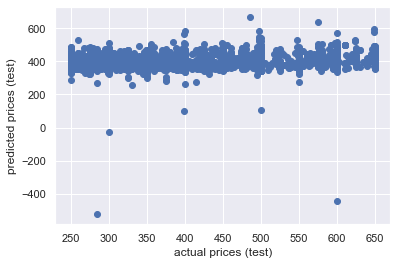

In [164]:
plt.scatter(prices_test,prices_test_pred)
plt.xlabel('actual prices (test)')
plt.ylabel('predicted prices (test)')

C:\Users\matte\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


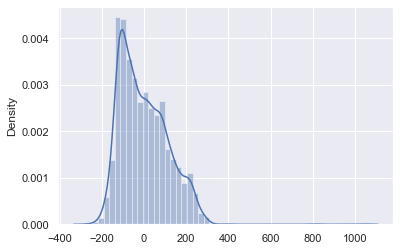

In [165]:
#Plot residuals:
sns.distplot((prices_test-prices_test_pred),bins=50);

In [169]:
#Let's look at the coefficients of the model
# intercept
numerical_polyreg_lasso_CVmodel.best_estimator_['lasso'].intercept_

389.98116926461955

In [176]:
#coefficients for each variable:
coeff_df = pd.DataFrame(numerical_polyreg_lasso_CVmodel.best_estimator_['lasso'].coef_,columns=['Lasso Reg Coeff']) #numerical_columns,
coeff_df.sort_values(by='Lasso Reg Coeff', ascending=False)

,Lasso Reg Coeff
4,29.613393
134,23.217979
61,21.388187
10,20.359942
17,18.993093
...,...
12,-13.647082
19,-14.577884
36,-18.540016
115,-24.515830


In [ ]:
### The best linear model using only numerical variables seems to be the basic Linear Regression model, so I save it (unless alread done so)

In [ ]:
#To save the trained model:
from joblib import dump, load
dump(model, 'filename.joblib') 

In [ ]:
#To load the model later:
clf = load('filename.joblib') 

In [ ]:
#I will save the model with dill after fitting the model the first time, then I will load it from memory the following times
from joblib import dump, load

load('numerical_linreg_pipe.joblib') 

#If the model file already exists, I load it:
try:
    with open('numerical_linreg_pipe.joblib', 'rb') as f:
        numerical_linreg_pipe = load(f)
        print('Loaded pickle file with numerical-only linear regression.')
except: #if not, actually perform the fit then save the model for next time:
    
    numerical_linreg_pipe.fit(paintings_df_train,prices_train);
    
    with open('numerical_linreg_pipe.joblib', 'wb') as f:
        dump(numerical_linreg_pipe, 'numerical_linreg_pipe.joblib') 
    print('Saved pickle file with numerical-only linear regression.')

# #Version with dill

# import dill

# #If the model file already exists, I load it:
# try:
#     with open('lat_long_model.dill', 'rb') as f:
#         lat_long_model = dill.load(f)
#         print('Loaded pickle file with lat-long model.')
# except: #if not, actually perform the fit then save the model for next time:
    
#     lat_long_model.fit(data_shuffled, star_ratings_shuffled)
    
#     with open('lat_long_model.dill', 'wb') as f:
#         dill.dump(lat_long_model, f)
#     print('Saved pickle file with lat-long model.')


## 2) Models using only categorical features

In [ ]:
#TO be continued...

## n) Nearest Neighbors Regression

Now, let's feed the output of the transformer in to a `KNeighborsRegressor`. As a sanity check, we'll test it with the first 5 rows.

In [34]:
from sklearn.neighbors import KNeighborsRegressor

# Training the model
data_transform = to_data_frame.transform(data)
data_transform = selector.fit_transform(data_transform)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(data_transform, star_ratings)

# Making predictions
test_data = data[:5]
test_data_transform = to_data_frame.transform(test_data)
test_data_transform = selector.transform(test_data_transform)
knn.predict(test_data_transform)

array([4. , 4.2, 4. , 3.8, 4.2])

We are not ready to submit to the grader; there are two things we still need to do:
1. Wrap all the steps necessary to go from our data (list of dictionaries) to predicted ratings
1. Determine the optimal value for our predictor's hyperparameter

For the first point, we will use a pipeline, ensuring that our model applies all the required transformations given the form of the input data. Remember that a pipeline is made with a list of `(step_name, estimator)` tuples.

In [35]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('to dataframe', ToDataFrame()),
    ('lat long selector', selector),
    ('regressor',KNeighborsRegressor(n_neighbors=5))
])



In [36]:
from sklearn import set_config
set_config(display='diagram')

pipe


Pipeline(steps=[('to dataframe', ToDataFrame()),
                ('lat long selector',
                 ColumnTransformer(transformers=[('lat_long', 'passthrough',
                                                  ['latitude', 'longitude']),
                                                 ('other', 'drop',
                                                  ['business_id',
                                                   'full_address', 'hours',
                                                   'open', 'categories', 'city',
                                                   'review_count', 'name',
                                                   'neighborhoods', 'state',
                                                   'stars', 'attributes',
                                                   'type'])])),
                ('regressor', KNeighborsRegressor())])

In [37]:
#can access the steps by name:
pipe.named_steps

{'to dataframe': ToDataFrame(),
 'lat long selector': ColumnTransformer(transformers=[('lat_long', 'passthrough',
                                  ['latitude', 'longitude']),
                                 ('other', 'drop',
                                  ['business_id', 'full_address', 'hours',
                                   'open', 'categories', 'city', 'review_count',
                                   'name', 'neighborhoods', 'state', 'stars',
                                   'attributes', 'type'])]),
 'regressor': KNeighborsRegressor()}

In [38]:
#and see the parameters with (I guess only after fitting..)
pipe.get_params()

{'memory': None,
 'steps': [('to dataframe', ToDataFrame()),
  ('lat long selector',
   ColumnTransformer(transformers=[('lat_long', 'passthrough',
                                    ['latitude', 'longitude']),
                                   ('other', 'drop',
                                    ['business_id', 'full_address', 'hours',
                                     'open', 'categories', 'city', 'review_count',
                                     'name', 'neighborhoods', 'state', 'stars',
                                     'attributes', 'type'])])),
  ('regressor', KNeighborsRegressor())],
 'verbose': False,
 'to dataframe': ToDataFrame(),
 'lat long selector': ColumnTransformer(transformers=[('lat_long', 'passthrough',
                                  ['latitude', 'longitude']),
                                 ('other', 'drop',
                                  ['business_id', 'full_address', 'hours',
                                   'open', 'categories', 'city', 'rev

Now let's fit and predict.

In [39]:
pipe.fit(data, star_ratings)
pipe.predict(data[:5])

array([4. , 4.2, 4. , 3.8, 4.2])

Let's now focus on the second point. The `KNeighborsRegressor` takes the `n_neighbors` hyperparameter, which tells it how many nearest neighbors to average together when making a prediction. There is no reason to believe that 5 is the optimum value. We will need to determine a better value for this hyperparameter. A common approach is to use a hyperparameter searching tool such as [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). You may need to refer back to the notebooks about the ways to interface searching tools and pipelines.

You should consider whether the data needs to be shuffled as it might not have been randomized. For example, the data could be ordered by a certain feature or by the labels. If you perform a train/test split with [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split), the data is shuffled by default. However, when using `GridSearchCV`, the folds are not shuffled when you use the default K-folds cross-validation.

The code below will plot a rolling mean of the star ratings. Do you need to shuffle the data?

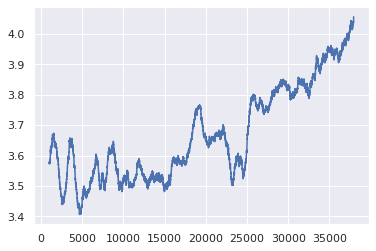

In [40]:
from pandas import Series
import matplotlib.pyplot as plt

plt.plot(Series.rolling(Series(star_ratings), window=1000).mean());

Once you've found a good value of `n_neighbors`, submit the model to the grader. Note, "good" is a relative measure here. The reference solution has an $R^2$ score of only 0.02. There is just rather little signal available for modeling.

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'regressor__n_neighbors': range(1, 80, 2)} 
lat_long_model = GridSearchCV(pipe, param_grid, cv=5, n_jobs=2, verbose=1)

#Doing the following directly, without reshuffling the data, gave crappy results so I am commenting it now 
#lat_long_model.fit(data, star_ratings)

In [42]:
len(df.index)

37938

In [43]:
#Let's try to train the pipeline on shuffled data, since the estimator was performly so poorly 
#(as it would have picked up the monotonic relation in the training set, which would then make it perform
#poorly on the test data that don't have that monotonic relation)

In [44]:
shuffle_rows_idx = np.random.RandomState(seed=101).permutation(len(df.index))

In [45]:
len(shuffle_rows_idx)

37938

In [46]:
shuffle_rows_idx[:10]

array([27749, 37472, 27631,  6094, 13092, 17414, 18069, 28532, 12465,
        4666])

In [47]:
#Apply the same reshuffling to the rows of the 'data' dataframe and the array of labels

In [48]:
data_shuffled = [data[i] for i in shuffle_rows_idx]

In [49]:
data_shuffled[0]

{'business_id': 'yaMFJWd8aDipVDRNZjxaPA',
 'full_address': 'The Balmoral Hotel\n1 Princes St\nOld Town\nEdinburgh EH2 2EQ',
 'hours': {'Monday': {'close': '00:00', 'open': '09:00'},
  'Tuesday': {'close': '00:00', 'open': '09:00'},
  'Friday': {'close': '00:00', 'open': '09:00'},
  'Wednesday': {'close': '00:00', 'open': '09:00'},
  'Thursday': {'close': '00:00', 'open': '09:00'},
  'Sunday': {'close': '00:00', 'open': '09:00'},
  'Saturday': {'close': '00:00', 'open': '09:00'}},
 'open': True,
 'categories': ['Food', 'Coffee & Tea'],
 'city': 'Edinburgh',
 'review_count': 5,
 'name': 'Palm Court',
 'neighborhoods': ['Old Town'],
 'longitude': -3.189613,
 'state': 'EDH',
 'stars': 4.0,
 'latitude': 55.9526566,
 'attributes': {'Wi-Fi': 'paid',
  'Price Range': 4,
  'Alcohol': 'full_bar',
  'Coat Check': True,
  'Happy Hour': False,
  'Outdoor Seating': False,
  'Parking': {'garage': False,
   'street': False,
   'validated': False,
   'lot': False,
   'valet': False},
  'Accepts Credit 

In [50]:
data[27749]

{'business_id': 'yaMFJWd8aDipVDRNZjxaPA',
 'full_address': 'The Balmoral Hotel\n1 Princes St\nOld Town\nEdinburgh EH2 2EQ',
 'hours': {'Monday': {'close': '00:00', 'open': '09:00'},
  'Tuesday': {'close': '00:00', 'open': '09:00'},
  'Friday': {'close': '00:00', 'open': '09:00'},
  'Wednesday': {'close': '00:00', 'open': '09:00'},
  'Thursday': {'close': '00:00', 'open': '09:00'},
  'Sunday': {'close': '00:00', 'open': '09:00'},
  'Saturday': {'close': '00:00', 'open': '09:00'}},
 'open': True,
 'categories': ['Food', 'Coffee & Tea'],
 'city': 'Edinburgh',
 'review_count': 5,
 'name': 'Palm Court',
 'neighborhoods': ['Old Town'],
 'longitude': -3.189613,
 'state': 'EDH',
 'stars': 4.0,
 'latitude': 55.9526566,
 'attributes': {'Wi-Fi': 'paid',
  'Price Range': 4,
  'Alcohol': 'full_bar',
  'Coat Check': True,
  'Happy Hour': False,
  'Outdoor Seating': False,
  'Parking': {'garage': False,
   'street': False,
   'validated': False,
   'lot': False,
   'valet': False},
  'Accepts Credit 

In [51]:
star_ratings_shuffled = star_ratings.copy()

for i, i_shuf in enumerate(shuffle_rows_idx):
    star_ratings_shuffled[i] = star_ratings[i_shuf]

In [52]:
star_ratings_shuffled[0]

4.0

In [53]:
star_ratings[27749]

4.0

In [54]:
star_ratings_shuffled[2]

4.0

In [55]:
star_ratings[27631]

4.0

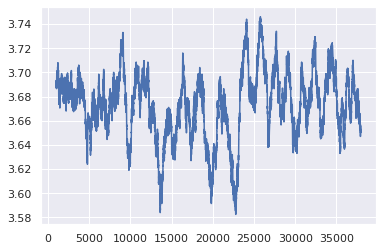

In [56]:
#Shuffle seems to have worked, as confirmed by this plot:
plt.plot(Series.rolling(Series(star_ratings_shuffled), window=1000).mean());


### This is the step that does the fitting, which is time consuming so once I got it working well I saved the model with 'dill' and in the following iterations I just loaded the model from memory


In [57]:
#I will save the model with dill after fitting the model the first time, then I will load it from memory the following times
import dill

#If the model file already exists, I load it:
try:
    with open('lat_long_model.dill', 'rb') as f:
        lat_long_model = dill.load(f)
        print('Loaded pickle file with lat-long model.')
except: #if not, actually perform the fit then save the model for next time:
    
    lat_long_model.fit(data_shuffled, star_ratings_shuffled)
    
    with open('lat_long_model.dill', 'wb') as f:
        dill.dump(lat_long_model, f)
    print('Saved pickle file with lat-long model.')


Loaded pickle file with lat-long model.


In [58]:
lat_long_model.cv_results_

{'mean_fit_time': array([0.31031671, 0.25429988, 0.25634913, 0.30448503, 0.30310516,
        0.30763321, 0.28803892, 0.25615807, 0.28948727, 0.28568292,
        0.27822719, 0.30068026, 0.26416235, 0.26170411, 0.29616361,
        0.28795762, 0.28720355, 0.29786735, 0.29280725, 0.281423  ,
        0.25811419, 0.28116522, 0.2710392 , 0.28757052, 0.27150102,
        0.25751028, 0.27196698, 0.28942199, 0.26810493, 0.2644876 ,
        0.27520437, 0.29240789, 0.22081633, 0.24692397, 0.23243327,
        0.31394067, 0.27959347, 0.25400114, 0.2340641 , 0.22626362]),
 'std_fit_time': array([0.00763525, 0.04732071, 0.0513129 , 0.00750896, 0.03243072,
        0.01948195, 0.04078417, 0.04947574, 0.04119073, 0.03643361,
        0.05114815, 0.03856726, 0.05773887, 0.05347444, 0.03395494,
        0.04051516, 0.04191097, 0.03537533, 0.03453338, 0.04976126,
        0.05986515, 0.04840777, 0.05288595, 0.0448675 , 0.04768975,
        0.04939519, 0.04781436, 0.03921592, 0.05080988, 0.04748003,
        0.060

In [59]:
#The performance (as assessed in the 'mean_test_score' for the max index, which is 2 before the last) of this model
#is in the R^2=0.02 range, so it's comparable to what was mentioned earlier as the goal

In [60]:
lat_long_model.best_params_

{'regressor__n_neighbors': 75}

In [61]:
##Note: without shuffling the training data, and only looking at 1-10 neighbors, the pipeline gave a terrible score on the test set: -0.922 

##With shuffling the data but only looking at 1-10 neighbors, the score was just slightly better: -0.7959

##Only when I increased the number of possible neighbors to 50-80 did I get sufficient performances

#grader.score('ml__lat_long_model', lat_long_model.predict)  # Edit to appropriate name

## Question 4: category_model

While location is important, we could also try seeing how predictive the
venue's category is. Build an estimator that considers only the `'categories'` field of the data.

The categories come as a list of strings, but the scikit-learn's predictors all need numeric input. We ultimately want to create a column in our feature matrix to represent every category. For a given row, only the columns that represent the categories it contains will be filled with a one, otherwise, it will be filled with a zero. The described method is similar to **one-hot encoding**, however, an observation/row can contain more than one "hot", non-zero, column.

To achieve our encoding plan, we need to use scikit-learn's provides [`DictVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html#sklearn.feature_extraction.DictVectorizer). This transformer takes a 1-D array of dictionaries and creates a column in the output matrix for each key in the dictionary and fills it with the value associated with it. Missing keys are filled with zeros. However, we need to build a transformer that takes an array of strings and returns an array of dictionaries with keys given by those strings and values of one. For example, it should transform `X_in` into `X_out`.

In [62]:
X_in = pd.Series([['a'], ['b', 'c']])
X_out = pd.Series([{'a': 1}, {'b': 1, 'c': 1}])

print(X_in)
print(X_out)

0       [a]
1    [b, c]
dtype: object
0            {'a': 1}
1    {'b': 1, 'c': 1}
dtype: object


In [63]:
def stringlist_to_dict(stringlist):
    dict = {}
    for string in stringlist:
        dict[string]=1
    return dict

stringlist_to_dict(['a'])

{'a': 1}

In [64]:
stringlist_to_dict(['b','c'])

{'b': 1, 'c': 1}

In [65]:
pd.Series([stringlist_to_dict(string_list) for string_list in X_in])

0            {'a': 1}
1    {'b': 1, 'c': 1}
dtype: object

In [66]:
#df.head()
df['categories'].iloc[:5]

0                          [Doctors, Health & Medical]
1                                        [Restaurants]
2                [American (Traditional), Restaurants]
3    [Food, Ice Cream & Frozen Yogurt, Fast Food, R...
4                               [Chinese, Restaurants]
Name: categories, dtype: object

In [67]:
df['categories'].apply(stringlist_to_dict)

0                    {'Doctors': 1, 'Health & Medical': 1}
1                                       {'Restaurants': 1}
2          {'American (Traditional)': 1, 'Restaurants': 1}
3        {'Food': 1, 'Ice Cream & Frozen Yogurt': 1, 'F...
4                         {'Chinese': 1, 'Restaurants': 1}
                               ...                        
37933    {'Bars': 1, 'Hookah Bars': 1, 'Nightlife': 1, ...
37934    {'Active Life': 1, 'Barre Classes': 1, 'Pilate...
37935                {'Yelp Events': 1, 'Local Flavor': 1}
37936    {'Kosher': 1, 'Italian': 1, 'Pizza': 1, 'Resta...
37937    {'Food': 1, 'Ethnic Food': 1, 'Grocery': 1, 'S...
Name: categories, Length: 37938, dtype: object

In [68]:
X_in.apply(stringlist_to_dict)

0            {'a': 1}
1    {'b': 1, 'c': 1}
dtype: object

In [69]:
class DictEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # X will be a pandas series. Return a pandas series of dictionaries
        return X.apply(stringlist_to_dict)

Now let's test out that our `DictEncoder` works out as expected.

In [70]:
# Check that DictEncoder transforms a series of list of strings into the expected series of dictionaries
grader.check((DictEncoder().fit_transform(X_in) == X_out).all())

True

Now, create a pipeline object of the two step transformation for the categories data. Afterwards, create a `ColumnTransformer` object that will use the aforementioned pipeline object to transform the `'categories'` field.

In [71]:
from sklearn.feature_extraction import DictVectorizer

pipe_categ_encoding = Pipeline([
    ('to dict series',DictEncoder()),
    ('to binary vectors',DictVectorizer())
])

In [72]:
#test the little pipeline first:
pipe_categ_encoding.fit_transform(X_in)

<2x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [73]:
#to visualize how these columns look like:
pipe_categ_encoding.fit_transform(X_in).toarray()


array([[1., 0., 0.],
       [0., 1., 1.]])

In [74]:
#this is not really needed, but I just have it here to visualize the other columns I will not be using
other_columns = [column for column in df.columns if column != 'categories']
other_columns


['business_id',
 'full_address',
 'hours',
 'open',
 'city',
 'review_count',
 'name',
 'neighborhoods',
 'longitude',
 'state',
 'stars',
 'latitude',
 'attributes',
 'type']

In [75]:
#note: here 'categories' should not be bracketed (['categories']) because our transformer expects a series 
#(a one-dimensional object) and would give error if you try to do ['categories'] which returns a 2-dim object

# #Old version:
# categ_tranform = ColumnTransformer([
#     ('categories', pipe_categ_encoding, 'categories'),
#     ('other', 'drop', other_columns)
# ])

#This is a cleaner version to clarify I am dropping all other columns (although 'drop' is the default anyway):
categ_tranform = ColumnTransformer([
    ('categories', pipe_categ_encoding, 'categories'),
], remainder='drop')

In [76]:
#Let's test this in isolation
categ_tranform.fit_transform(df)

<37938x706 sparse matrix of type '<class 'numpy.float64'>'
	with 108205 stored elements in Compressed Sparse Row format>

Finally, create a pipeline object that will
1. Convert our list of dictionaries into a data frame
1. Select the `'categories'` column and encode the data
1. Train a regularized linear model such as `Ridge`

There will be a large number of features, one for each category, so there is a significant danger of overfitting. Use cross validation to choose the best regularization parameter.

In [77]:
from sklearn.linear_model import Ridge

pipe_categ = Pipeline([
    ('to dataframe', ToDataFrame()),
    ('categories selection and encoding', categ_tranform),
    ('regressor',Ridge(alpha=0.001))
])

In [78]:
#Let's see if the pipeline works (i.e. can be fit successfully)
pipe_categ.fit(data_shuffled, star_ratings_shuffled)


Pipeline(steps=[('to dataframe', ToDataFrame()),
                ('categories selection and encoding',
                 ColumnTransformer(transformers=[('categories',
                                                  Pipeline(steps=[('to dict '
                                                                   'series',
                                                                   DictEncoder()),
                                                                  ('to binary '
                                                                   'vectors',
                                                                   DictVectorizer())]),
                                                  'categories')])),
                ('regressor', Ridge(alpha=0.001))])

In [79]:
pipe_categ.get_params()

{'memory': None,
 'steps': [('to dataframe', ToDataFrame()),
  ('categories selection and encoding',
   ColumnTransformer(transformers=[('categories',
                                    Pipeline(steps=[('to dict series',
                                                     DictEncoder()),
                                                    ('to binary vectors',
                                                     DictVectorizer())]),
                                    'categories')])),
  ('regressor', Ridge(alpha=0.001))],
 'verbose': False,
 'to dataframe': ToDataFrame(),
 'categories selection and encoding': ColumnTransformer(transformers=[('categories',
                                  Pipeline(steps=[('to dict series',
                                                   DictEncoder()),
                                                  ('to binary vectors',
                                                   DictVectorizer())]),
                                  'categories')]),
 '

In [80]:
#import np
#from sklearn.model_selection import GridSearchCV

param_grid = {'regressor__alpha': np.logspace(-5,5,10)} 
category_model = GridSearchCV(pipe_categ, param_grid, cv=5, n_jobs=2, verbose=1)


### This is the step that does the fitting, which is time consuming so once I got it working well I saved the model with 'dill' and in the following iterations I just loaded the model from memory

In [81]:
#I will save the model with dill after fitting the model the first time, then I will load it from memory the following times
import dill

#If the model file already exists, I load it:
try:
    with open('category_model.dill', 'rb') as f:
        category_model = dill.load(f)
        print('Loaded pickle file with category model.')
except: #if not, actually perform the fit then save the model for next time:
    
    category_model.fit(data_shuffled, star_ratings_shuffled)
    
    with open('category_model.dill', 'wb') as f:
        dill.dump(category_model, f)
    print('Saved pickle file with category model.')

Loaded pickle file with category model.


In [82]:
category_model.best_params_

{'regressor__alpha': 3.593813663804626}

In [83]:
#Let's see how was the performance of this model on the different folds
category_model.cv_results_

{'mean_fit_time': array([0.48531518, 0.51297684, 0.50246615, 0.54530277, 0.52666807,
        0.47363896, 0.40665159, 0.38662996, 0.43180146, 0.309513  ]),
 'std_fit_time': array([0.08905216, 0.08792356, 0.08278589, 0.08225683, 0.03501576,
        0.06665968, 0.0740036 , 0.07943187, 0.07294974, 0.015022  ]),
 'mean_score_time': array([0.07652116, 0.08809199, 0.08513875, 0.08997145, 0.08667512,
        0.09187498, 0.08175406, 0.08113384, 0.09276829, 0.06228304]),
 'std_score_time': array([0.01854407, 0.01870421, 0.01923949, 0.01607151, 0.01710597,
        0.01655862, 0.02161346, 0.01652238, 0.01797501, 0.00216464]),
 'param_regressor__alpha': masked_array(data=[1e-05, 0.0001291549665014884, 0.0016681005372000592,
                    0.021544346900318846, 0.2782559402207126,
                    3.593813663804626, 46.41588833612782,
                    599.4842503189421, 7742.636826811277, 100000.0],
              mask=[False, False, False, False, False, False, False, False,
              

In [84]:
#It's around 0.16-0.17 on the test folds. The best score (the mean of scores on test folds for the best choice of parameter)
#can be looked at with:
category_model.best_score_

0.17526931271462565

In [85]:
#grader.score('ml__category_model', category_model.predict)  # Edit to appropriate name

**Extension:** Some categories (e.g., Restaurants) are not very specific. Others (Japanese sushi) are much more so.  One way to deal with this is with an measure call term frequency-inverse document frequency (tf-idf). Add in a [`TfidfTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) between the `DictVectorizer` and the linear model, and see if that improves performance.

In [86]:
#Define category_model_improved as described above

## Question 5: attribute_model

There is even more information in the attributes for each venue.  Let's build an estimator based on these.

Venues attributes may be nested:
```python
{
  'Attire': 'casual',
  'Accepts Credit Cards': True,
  'Ambiance': {'casual': False, 'classy': False}
}
```
We wish to encode them in the same manner as our categories data using the `DictVectorizer`. Before we do so, we need to flatten the dictionary to a single level:
```python
{
  'Attire_casual' : 1,
  'Accepts Credit Cards': 1,
  'Ambiance_casual': 0,
  'Ambiance_classy': 0
}
```
Build a custom transformer that flattens the dictionary for the `'attributes'` field. Similar to what was done before, create a model that properly encodes the attribute data and learns to predict the ratings.

You may find it difficult to find a single regressor that does well enough. A common solution is to use a linear model to fit the linear part of some data, and use a non-linear model to fit the residual that the linear model can't fit. Build a custom predictor that takes as an argument two other predictors. It should use the first to fit the raw data and the second to fit the residuals of the first.

In [87]:
df.iloc[:5]['attributes']

0                        {'By Appointment Only': True}
1    {'Take-out': True, 'Good For': {'dessert': Fal...
2    {'Take-out': True, 'Good For': {'dessert': Fal...
3    {'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...
4    {'Take-out': True, 'Has TV': False, 'Outdoor S...
Name: attributes, dtype: object

In [88]:
df.iloc[1]['attributes']

{'Take-out': True,
 'Good For': {'dessert': False,
  'latenight': False,
  'lunch': True,
  'dinner': False,
  'breakfast': False,
  'brunch': False},
 'Caters': False,
 'Noise Level': 'average',
 'Takes Reservations': False,
 'Delivery': False,
 'Ambience': {'romantic': False,
  'intimate': False,
  'touristy': False,
  'hipster': False,
  'divey': False,
  'classy': False,
  'trendy': False,
  'upscale': False,
  'casual': False},
 'Parking': {'garage': False,
  'street': False,
  'validated': False,
  'lot': True,
  'valet': False},
 'Has TV': True,
 'Outdoor Seating': False,
 'Attire': 'casual',
 'Alcohol': 'none',
 'Waiter Service': True,
 'Accepts Credit Cards': True,
 'Good for Kids': True,
 'Good For Groups': True,
 'Price Range': 1}

In [89]:
df.iloc[1]['attributes']['Good For'].items()

dict_items([('dessert', False), ('latenight', False), ('lunch', True), ('dinner', False), ('breakfast', False), ('brunch', False)])

In [90]:
def flatten_dict(nested_dict):
    flat_dict={}
    for key,val in nested_dict.items():
        if isinstance(val,bool):
            flat_dict[key] = int(val)
        else: #in this case the value of the first dict is a dict itself or is a single, non-boolean, value (string, number, etc.) 
            #print(val)
            try: 
                for inner_key, inner_val in nested_dict[key].items():
                    extend_key = '_'.join([key,inner_key])
                    flat_dict[extend_key] = int(inner_val)

            except: #case of a single value but not boolean
                extend_key = '_'.join([key,str(val)])
                flat_dict[extend_key] = 1
    return flat_dict
        

In [91]:
flatten_dict(df.iloc[1]['attributes'])

{'Take-out': 1,
 'Good For_dessert': 0,
 'Good For_latenight': 0,
 'Good For_lunch': 1,
 'Good For_dinner': 0,
 'Good For_breakfast': 0,
 'Good For_brunch': 0,
 'Caters': 0,
 'Noise Level_average': 1,
 'Takes Reservations': 0,
 'Delivery': 0,
 'Ambience_romantic': 0,
 'Ambience_intimate': 0,
 'Ambience_touristy': 0,
 'Ambience_hipster': 0,
 'Ambience_divey': 0,
 'Ambience_classy': 0,
 'Ambience_trendy': 0,
 'Ambience_upscale': 0,
 'Ambience_casual': 0,
 'Parking_garage': 0,
 'Parking_street': 0,
 'Parking_validated': 0,
 'Parking_lot': 1,
 'Parking_valet': 0,
 'Has TV': 1,
 'Outdoor Seating': 0,
 'Attire_casual': 1,
 'Alcohol_none': 1,
 'Waiter Service': 1,
 'Accepts Credit Cards': 1,
 'Good for Kids': 1,
 'Good For Groups': 1,
 'Price Range_1': 1}

In [92]:
class DictFlattener(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # X will be a pandas column made of nested dictionaries. Return a pandas series of flattened dictionaries
        return X.apply(flatten_dict)

In [93]:
test_flattener = DictFlattener()
test_flattened_attributes = test_flattener.fit_transform(df['attributes'])
test_flattened_attributes

0                               {'By Appointment Only': 1}
1        {'Take-out': 1, 'Good For_dessert': 0, 'Good F...
2        {'Take-out': 1, 'Good For_dessert': 0, 'Good F...
3        {'Take-out': 1, 'Wi-Fi_free': 1, 'Takes Reserv...
4        {'Take-out': 1, 'Has TV': 0, 'Outdoor Seating'...
                               ...                        
37933    {'Alcohol_none': 1, 'Good For Dancing': 1, 'No...
37934                                                   {}
37935                                 {'Good for Kids': 0}
37936    {'Take-out': 1, 'Wi-Fi_no': 1, 'Good For_desse...
37937    {'Parking_garage': 0, 'Parking_street': 0, 'Pa...
Name: attributes, Length: 37938, dtype: object

In [94]:
from sklearn.feature_extraction import DictVectorizer

pipe_attrib_encoding = Pipeline([
    ('to dict series',DictFlattener()),
    ('to binary vectors',DictVectorizer())
])

In [95]:
attrib_tranform = ColumnTransformer([
    ('attributes', pipe_attrib_encoding, 'attributes'),
], remainder='drop')

In [96]:
#Let's see how the attribute columns look like at this point
pipe_attrib_before_reg = Pipeline([
    ('to dataframe', ToDataFrame()),
    ('attributes selection and encoding', attrib_tranform),
])

In [97]:
test_vectorizer = DictVectorizer()
test_vectorized_attributes = test_vectorizer.fit_transform(test_flattened_attributes)
test_vectorized_attributes

<37938x96 sparse matrix of type '<class 'numpy.float64'>'
	with 531447 stored elements in Compressed Sparse Row format>

In [98]:
test_vectorizer.feature_names_

['Accepts Credit Cards',
 'Accepts Insurance',
 'Ages Allowed_18plus',
 'Ages Allowed_21plus',
 'Ages Allowed_allages',
 'Alcohol_beer_and_wine',
 'Alcohol_full_bar',
 'Alcohol_none',
 'Ambience_casual',
 'Ambience_classy',
 'Ambience_divey',
 'Ambience_hipster',
 'Ambience_intimate',
 'Ambience_romantic',
 'Ambience_touristy',
 'Ambience_trendy',
 'Ambience_upscale',
 'Attire_casual',
 'Attire_dressy',
 'Attire_formal',
 'BYOB',
 'BYOB/Corkage_no',
 'BYOB/Corkage_yes_corkage',
 'BYOB/Corkage_yes_free',
 'By Appointment Only',
 'Caters',
 'Coat Check',
 'Corkage',
 'Delivery',
 'Dietary Restrictions_dairy-free',
 'Dietary Restrictions_gluten-free',
 'Dietary Restrictions_halal',
 'Dietary Restrictions_kosher',
 'Dietary Restrictions_soy-free',
 'Dietary Restrictions_vegan',
 'Dietary Restrictions_vegetarian',
 'Dogs Allowed',
 'Drive-Thru',
 'Good For Dancing',
 'Good For Groups',
 'Good For Kids',
 'Good For_breakfast',
 'Good For_brunch',
 'Good For_dessert',
 'Good For_dinner',
 'Go

In [99]:
attribute_columns = pipe_attrib_before_reg.fit_transform(data_shuffled)

In [100]:
attribute_columns

<37938x96 sparse matrix of type '<class 'numpy.float64'>'
	with 531447 stored elements in Compressed Sparse Row format>

In [101]:
attribute_columns_df = pd.DataFrame(attribute_columns.todense(),columns=test_vectorizer.feature_names_)
attribute_columns_df

,Accepts Credit Cards,Accepts Insurance,Ages Allowed_18plus,Ages Allowed_21plus,Ages Allowed_allages,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_none,Ambience_casual,Ambience_classy,...,Smoking_no,Smoking_outdoor,Smoking_yes,Take-out,Takes Reservations,Waiter Service,Wheelchair Accessible,Wi-Fi_free,Wi-Fi_no,Wi-Fi_paid
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37933,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37935,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
37936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
#LEt's check if the data is correct
df.iloc[shuffle_rows_idx[0]]['attributes']

{'Wi-Fi': 'paid',
 'Price Range': 4,
 'Alcohol': 'full_bar',
 'Coat Check': True,
 'Happy Hour': False,
 'Outdoor Seating': False,
 'Parking': {'garage': False,
  'street': False,
  'validated': False,
  'lot': False,
  'valet': False},
 'Accepts Credit Cards': True,
 'Wheelchair Accessible': True}

In [103]:
from sklearn.linear_model import Ridge

pipe_attrib = Pipeline([
    ('to dataframe', ToDataFrame()),
    ('attributes selection and encoding', attrib_tranform),
    ('regressor',Ridge(alpha=0.001))
])

In [104]:
pipe_attrib

Pipeline(steps=[('to dataframe', ToDataFrame()),
                ('attributes selection and encoding',
                 ColumnTransformer(transformers=[('attributes',
                                                  Pipeline(steps=[('to dict '
                                                                   'series',
                                                                   DictFlattener()),
                                                                  ('to binary '
                                                                   'vectors',
                                                                   DictVectorizer())]),
                                                  'attributes')])),
                ('regressor', Ridge(alpha=0.001))])

In [105]:
#Because all these attribute features are 0 or 1, there really is no need to do any scaling, etc.

In [106]:
#Let's do a cross validation as before and see how well does this model perform:
param_grid = {'regressor__alpha': np.logspace(-5,5,10)} 
attribute_model_linear = GridSearchCV(pipe_attrib, param_grid, cv=5, n_jobs=2, verbose=1)

In [107]:
#I will save the model with dill after fitting the model the first time, then I will load it from memory the following times
import dill

#If the model file already exists, I load it:
try:
    with open('attribute_model_linear.dill', 'rb') as f:
        attribute_model_linear = dill.load(f)
        print('Loaded pickle file with attribute model PURELY LINEAR.')
except: #if not, actually perform the fit then save the model for next time:
    
    attribute_model_linear.fit(data_shuffled, star_ratings_shuffled)
    
    with open('attribute_model_linear.dill', 'wb') as f:
        dill.dump(attribute_model_linear, f)
    print('Saved pickle file with attribute model PURELY LINEAR.')

Loaded pickle file with attribute model PURELY LINEAR.


In [108]:
#Let's check the optimized 'alpha' to make sure I am not at the edge of the search space
attribute_model_linear.best_params_

{'regressor__alpha': 3.593813663804626}

In [109]:
#and check for the performance of this model
attribute_model_linear.cv_results_

{'mean_fit_time': array([0.91598926, 0.91220169, 1.01593409, 0.89907689, 0.88850031,
        0.89570875, 0.89332337, 0.79154811, 0.84176702, 0.81857204]),
 'std_fit_time': array([0.1403404 , 0.21749226, 0.14260783, 0.18129673, 0.14922617,
        0.13580751, 0.16494217, 0.09178925, 0.17068837, 0.16452408]),
 'mean_score_time': array([0.17948961, 0.14176545, 0.19908466, 0.17052131, 0.20418367,
        0.20438395, 0.17782383, 0.21418939, 0.15639744, 0.15324898]),
 'std_score_time': array([0.04748012, 0.00251481, 0.04235872, 0.03393325, 0.04377204,
        0.05108225, 0.04253237, 0.03912811, 0.00689144, 0.01274317]),
 'param_regressor__alpha': masked_array(data=[1e-05, 0.0001291549665014884, 0.0016681005372000592,
                    0.021544346900318846, 0.2782559402207126,
                    3.593813663804626, 46.41588833612782,
                    599.4842503189421, 7742.636826811277, 100000.0],
              mask=[False, False, False, False, False, False, False, False,
              

In [110]:
attribute_model_linear.best_score_

0.06989510915561545

In [111]:
## Let's check how badly does the purely linear model on the grader test set
#grader.score('ml__attribute_model', attribute_model_linear.predict)  

In [112]:
#Not that bad: around 0.75, but of course it's insufficient to pass the 0.9 threshold

In [113]:
#I now need to add a nonliner predictor at the end. First let's assess how the residuals from the linear predictor 
#look like for a random subset of the training data, and see if we can infer anything on 
#how to design the nonlinear model

In [114]:
#recall that data_shuffled (like data) is a list of dictionaries
data_shuffled[0]

{'business_id': 'yaMFJWd8aDipVDRNZjxaPA',
 'full_address': 'The Balmoral Hotel\n1 Princes St\nOld Town\nEdinburgh EH2 2EQ',
 'hours': {'Monday': {'close': '00:00', 'open': '09:00'},
  'Tuesday': {'close': '00:00', 'open': '09:00'},
  'Friday': {'close': '00:00', 'open': '09:00'},
  'Wednesday': {'close': '00:00', 'open': '09:00'},
  'Thursday': {'close': '00:00', 'open': '09:00'},
  'Sunday': {'close': '00:00', 'open': '09:00'},
  'Saturday': {'close': '00:00', 'open': '09:00'}},
 'open': True,
 'categories': ['Food', 'Coffee & Tea'],
 'city': 'Edinburgh',
 'review_count': 5,
 'name': 'Palm Court',
 'neighborhoods': ['Old Town'],
 'longitude': -3.189613,
 'state': 'EDH',
 'stars': 4.0,
 'latitude': 55.9526566,
 'attributes': {'Wi-Fi': 'paid',
  'Price Range': 4,
  'Alcohol': 'full_bar',
  'Coat Check': True,
  'Happy Hour': False,
  'Outdoor Seating': False,
  'Parking': {'garage': False,
   'street': False,
   'validated': False,
   'lot': False,
   'valet': False},
  'Accepts Credit 

In [115]:
len(data_shuffled)

37938

In [116]:
len(star_ratings_shuffled)

37938

In [117]:
#Let's pick every 8-th element (roughly 5000 points) as a temporary test set to look at
data_shuffled_test = data_shuffled[::8]
star_ratings_shuffled_test = star_ratings_shuffled[::8]

In [118]:
star_ratings_predicted_test = attribute_model_linear.predict(data_shuffled_test)

In [119]:
attribute_model_linear.score(data_shuffled_test,np.array(star_ratings_shuffled_test))

0.06345590812350554

Text(0, 0.5, 'predicted with linear model')

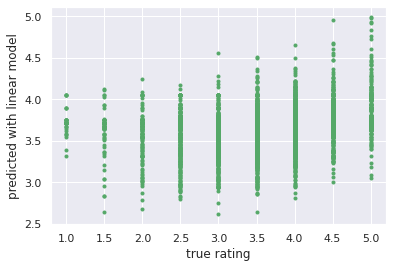

In [120]:
plt.plot(star_ratings_shuffled_test,star_ratings_predicted_test,'g.')
plt.xlabel('true rating')
plt.ylabel('predicted with linear model')

### Here starts the analysis of the analysis and fitting of the residuals after the linear modeling

In [121]:
res_linear_model_test = star_ratings_shuffled_test - star_ratings_predicted_test 

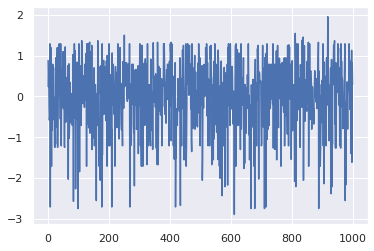

In [122]:
plt.plot(res_linear_model_test[:1000])

Text(0, 0.5, 'linear model error')

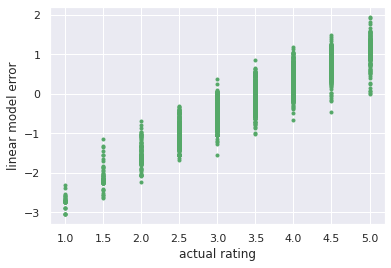

In [123]:
#Let's see where we make the most errors, by plotting residuals as a function of star rating
plt.plot(star_ratings_shuffled_test,res_linear_model_test,'g.')
plt.xlabel('actual rating')
plt.ylabel('linear model error')

/opt/conda/envs/data3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

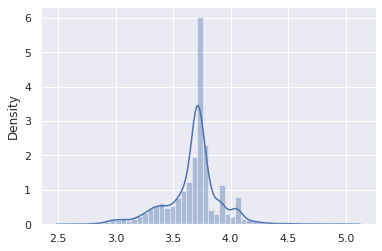

In [124]:
#It looks we are mostly predicting a star rating of 3-4 no-matter the actual rating... let's check if that's the case
sns.distplot(star_ratings_predicted_test)

<AxesSubplot:ylabel='Count'>

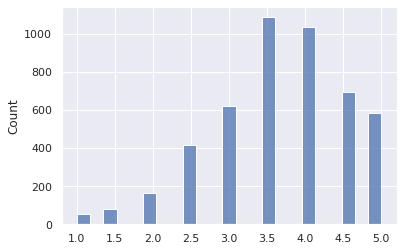

In [125]:
#Whereas the actual star ratings are more spread-out
sns.histplot(star_ratings_shuffled_test)

### Start with a polynomial model (order 2 or 3)

In [126]:
#Since we have errors in both directions (negative and positive), fitting a third order polynomial 
#or something like that to the residual error should work

In [127]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

second_order_residual_pipe = Pipeline([('to dataframe', ToDataFrame()),
    ('attributes selection and encoding', attrib_tranform),                                                                    
    ('polynomial_trans', PolynomialFeatures(degree=2,include_bias=False)),
    ('ridge', Ridge(alpha=1)) 
    ])

# I also tried 3rd order but gave worse results (probably it was overfitting, and I could only fit it on some of the data
# as it was taking too long to train)
#
# third_order_residual_pipe = Pipeline([('to dataframe', ToDataFrame()),
#     ('attributes selection and encoding', attrib_tranform),                                                                    
#     ('polynomial_trans', PolynomialFeatures(3,include_bias=False)),
#     ('ridge', Ridge(alpha=100)) #('ridge', Ridge(alpha=1)) #('ridge', Ridge(alpha=0.001))
#     ])


#I also tried order 4 but it crashed when fitting because it ran out of memory

In [128]:
np.array(res_linear_model_test).shape

(4743,)

In [129]:
#let's first see how the model does on just the 'test' subset of residuals

second_order_residual_pipe.fit(data_shuffled_test,np.array(res_linear_model_test))

#third_order_residual_pipe.fit(data_shuffled_test,np.array(res_linear_model_test))

Pipeline(steps=[('to dataframe', ToDataFrame()),
                ('attributes selection and encoding',
                 ColumnTransformer(transformers=[('attributes',
                                                  Pipeline(steps=[('to dict '
                                                                   'series',
                                                                   DictFlattener()),
                                                                  ('to binary '
                                                                   'vectors',
                                                                   DictVectorizer())]),
                                                  'attributes')])),
                ('polynomial_trans', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(alpha=1))])

In [130]:
second_order_residual_pipe_pred = second_order_residual_pipe.predict(data_shuffled_test)
second_order_residual_pipe_pred

#third_order_residual_pipe_pred = third_order_residual_pipe.predict(data_shuffled_test)
#third_order_residual_pipe_pred

array([ 0.79011618,  0.09837049, -0.00653432, ..., -0.02523548,
        0.53139525, -0.02523548])

In [131]:
second_order_residual_pipe_pred.min()
#third_order_residual_pipe_pred.min()

-2.145824847150685

In [132]:
second_order_residual_pipe_pred.max()
#third_order_residual_pipe_pred.max()

1.4604716118543917

Text(0, 0.5, 'predicted with nonlinear residual model')

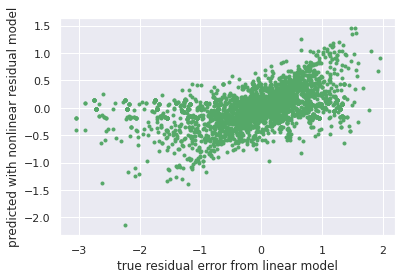

In [133]:
plt.plot(res_linear_model_test,second_order_residual_pipe_pred,'g.')
plt.xlabel('true residual error from linear model')
plt.ylabel('predicted with 2nd order nonlinear residual model')

#plt.plot(res_linear_model_test,third_order_residual_pipe_pred,'g.')
#plt.xlabel('true residual error from linear model')
#plt.ylabel('predicted with 3rd order nonlinear residual model')

In [134]:
#Although just on training data, the nonlinear predictor seems to be performing ok at least on some of the points. 
#Let's quantify:
second_order_residual_pipe.score(data_shuffled_test,res_linear_model_test)
#third_order_residual_pipe.score(data_shuffled_test,res_linear_model_test)

0.14250370238212984

In [135]:
second_order_residual_pipe.get_params()
#third_order_residual_pipe.get_params()

{'memory': None,
 'steps': [('to dataframe', ToDataFrame()),
  ('attributes selection and encoding',
   ColumnTransformer(transformers=[('attributes',
                                    Pipeline(steps=[('to dict series',
                                                     DictFlattener()),
                                                    ('to binary vectors',
                                                     DictVectorizer())]),
                                    'attributes')])),
  ('polynomial_trans', PolynomialFeatures(include_bias=False)),
  ('ridge', Ridge(alpha=1))],
 'verbose': False,
 'to dataframe': ToDataFrame(),
 'attributes selection and encoding': ColumnTransformer(transformers=[('attributes',
                                  Pipeline(steps=[('to dict series',
                                                   DictFlattener()),
                                                  ('to binary vectors',
                                                   DictVectorizer

In [136]:
#What are the coefficients of the final ridge predictor?
second_order_residual_pipe[-1].coef_
#third_order_residual_pipe[-1].coef_

array([ 0.08651004,  0.08129538,  0.01358685, ..., -0.32824648,
        0.        , -0.05797433])

In [137]:
#Let's try with cross validation to check for robustness of this result, and extend to the whole set of residuals
param_grid = {'ridge__alpha': np.logspace(-2,4,10)} 
second_order_residual_only_model = GridSearchCV(second_order_residual_pipe, param_grid, cv=5, n_jobs=2, verbose=15)

#param_grid = {'ridge__alpha': np.logspace(-2,4,10)} 
#third_order_residual_only_model = GridSearchCV(third_order_residual_pipe, param_grid, cv=5, n_jobs=2, verbose=15)

# #I first tried the following, but the very small values of alpha took a long time to converge, and the best value ended up 
# #being much higher - around 100-1000, so I focused on that region more afterwards
# param_grid = {'ridge__alpha': np.logspace(-5,5,10)} 
# third_order_residual_only_model = GridSearchCV(third_order_residual_pipe, param_grid, cv=5, n_jobs=2, verbose=15)

In [138]:
second_order_residual_only_model.fit(data_shuffled,star_ratings_shuffled-np.array(attribute_model_linear.predict(data_shuffled)))
    
   

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   44.8s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:   46.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done   8 tasks      | elapsed:  2.7min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  3.0min
[Parallel(n_jobs=2)]: Done  10 tasks      | elapsed:  3.2min
[Parallel(n_jobs=2)]: Done  11 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done  12 tasks      | elapsed:  3.5min
[Parallel(n_jobs=2)]: Done  13 tasks      | elapsed:  3.7min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  3.9min
[Parallel(n_jobs=2)]: Done  15 tasks      | elapsed:  4.0min
[Parallel(

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('to dataframe', ToDataFrame()),
                                       ('attributes selection and encoding',
                                        ColumnTransformer(transformers=[('attributes',
                                                                         Pipeline(steps=[('to '
                                                                                          'dict '
                                                                                          'series',
                                                                                          DictFlattener()),
                                                                                         ('to '
                                                                                          'binary '
                                                                                          'vectors',
                                                                                          DictVectorizer())]),
                                                                         'attributes')])),
                                       ('polynomial_trans',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ridge', Ridge(alpha=1))]),
             n_jobs=2,
             param_grid={'ridge__alpha': array([1.00000000e-02, 4.64158883e-02, 2.15443469e-01, 1.00000000e+00,
       4.64158883e+00, 2.15443469e+01, 1.00000000e+02, 4.64158883e+02,
       2.15443469e+03, 1.00000000e+04])},
             verbose=15)

In [139]:
#I will save the model with dill after fitting the model the first time, then I will load it from memory the following times

import dill

#If the model file already exists, I load it:
try:
    with open('attribute_model_2ndorder_residuals_only.dill', 'rb') as f:
        second_order_residual_only_model = dill.load(f)
        print('Loaded pickle file with attribute model 2nd degree polynomial for RESIDUALS ONLY.')
except: #if not, actually perform the fit then save the model for next time:
    
    second_order_residual_only_model.fit(data_shuffled,star_ratings_shuffled-np.array(attribute_model_linear.predict(data_shuffled)))
    
    with open('attribute_model_2ndorder_residuals_only.dill', 'wb') as f:
        dill.dump(second_order_residual_only_model, f)
    print('Saved pickle file with attribute model 2nd degree polynomial for RESIDUALS ONLY.')

    
#For the 3rd order, I had to limit myself to fitting on my smaller test set:
#third_order_residual_only_model.fit(data_shuffled_test,res_linear_model_test)
# #For some reason, this never converged with the full dataset when I used the 3rd order polynomial... probably too many points perhaps
#third_order_residual_only_model.fit(data_shuffled,star_ratings_shuffled-np.array(attribute_model_linear.predict(data_shuffled)))
          
# #If the model file already exists, I load it:
# try:
#     with open('attribute_model_3rdorder_residuals_only.dill', 'rb') as f:
#         third_order_residual_only_model = dill.load(f)
#         print('Loaded pickle file with attribute model 3rd degree polynomial for RESIDUALS ONLY.')
# except: #if not, actually perform the fit then save the model for next time:
    
#     third_order_residual_only_model.fit(data_shuffled_test,star_ratings_shuffled_test-np.array(attribute_model_linear.predict(data_shuffled_test)))
    
#     with open('attribute_model_3rdorder_residuals_only.dill', 'wb') as f:
#         dill.dump(third_order_residual_only_model, f)
#     print('Saved pickle file with attribute model 3rd degree polynomial for RESIDUALS ONLY.')

In [142]:
second_order_residual_only_model.best_params_
#third_order_residual_only_model.best_params_

{'ridge__alpha': 100.0}

In [143]:
second_order_residual_only_model.best_score_
#third_order_residual_only_model.best_score_

0.020390562206198594

In [144]:
#So I expect this predictor to perform ok when combined with the linear one in the fashion suggested in the problem

In [145]:
#Build a custom predictor that takes as an argument two other predictors. 
#It should use the first to fit the raw data and the second to fit the residuals of the first.

In [146]:
class CascadePredictor(BaseEstimator, RegressorMixin):
  def __init__(self, Predictor1, Predictor2):
    # initialization code
    self.predictor1 = Predictor1
    self.predictor2 = Predictor2

  def fit(self, X, y):
    # fit the model:
    self.predictor1.fit(X, y)
    res = y - np.array(self.predictor1.predict(X))
    self.predictor2.fit(X, res)
    return self

  def predict(self, X):
    # make predictions 
    return np.array(self.predictor1.predict(X)) + np.array(self.predictor2.predict(X))

  #def score(self, X, y):
  #  # custom score implementation
  #  # this is optional, if not defined default is R^2
  #  return ...

In [147]:
attribute_pipe = CascadePredictor(Predictor1=pipe_attrib,Predictor2=second_order_residual_pipe)
#attribute_pipe = CascadePredictor(Predictor1=pipe_attrib,Predictor2=third_order_residual_pipe)

In [148]:
attribute_pipe.predictor1.get_params()

{'memory': None,
 'steps': [('to dataframe', ToDataFrame()),
  ('attributes selection and encoding',
   ColumnTransformer(transformers=[('attributes',
                                    Pipeline(steps=[('to dict series',
                                                     DictFlattener()),
                                                    ('to binary vectors',
                                                     DictVectorizer())]),
                                    'attributes')])),
  ('regressor', Ridge(alpha=0.001))],
 'verbose': False,
 'to dataframe': ToDataFrame(),
 'attributes selection and encoding': ColumnTransformer(transformers=[('attributes',
                                  Pipeline(steps=[('to dict series',
                                                   DictFlattener()),
                                                  ('to binary vectors',
                                                   DictVectorizer())]),
                                  'attributes')])

In [149]:
params_dict1 = {'regressor__alpha':3.6}
attribute_pipe.predictor1.set_params(**params_dict1) #based on what found for the linear model alone

Pipeline(steps=[('to dataframe', ToDataFrame()),
                ('attributes selection and encoding',
                 ColumnTransformer(transformers=[('attributes',
                                                  Pipeline(steps=[('to dict '
                                                                   'series',
                                                                   DictFlattener()),
                                                                  ('to binary '
                                                                   'vectors',
                                                                   DictVectorizer())]),
                                                  'attributes')])),
                ('regressor', Ridge(alpha=3.6))])

In [150]:
#for 2nd order version:
params_dict2 = {'ridge__alpha':100} 
attribute_pipe.predictor2.set_params(**params_dict2)
#for 3rd order version:
#params_dict2 = {'ridge__alpha':1000} #{'ridge__alpha':0.001} #{'ridge__alpha':1e-05}

Pipeline(steps=[('to dataframe', ToDataFrame()),
                ('attributes selection and encoding',
                 ColumnTransformer(transformers=[('attributes',
                                                  Pipeline(steps=[('to dict '
                                                                   'series',
                                                                   DictFlattener()),
                                                                  ('to binary '
                                                                   'vectors',
                                                                   DictVectorizer())]),
                                                  'attributes')])),
                ('polynomial_trans', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(alpha=100))])

In [ ]:
#I will save the model with dill after fitting the model the first time, then I will load it from memory the following times

import dill

#If the model file already exists, I load it:
try:
    with open('attribute_model_linear_plus_2nddorder.dill', 'rb') as f:
        attribute_pipe = dill.load(f)
        print('Loaded pickle file with attribute model linear + 2nd degree polynomial on the residuals.')
except: #if not, actually perform the fit then save the model for next time:
    
    attribute_pipe.fit(data_shuffled,star_ratings_shuffled-np.array(attribute_model_linear.predict(data_shuffled)))
    
    with open('attribute_model_linear_plus_2nddorder.dill', 'wb') as f:
        dill.dump(attribute_pipe, f)
    print('Saved pickle file with attribute model linear + 2nd degree polynomial on the residuals.')

# # For the 3rd order polynomial this did not work:
# #attribute_pipe.fit(data_shuffled, star_ratings_shuffled)
# # and I instead had to use:
# #attribute_pipe.fit(data_shuffled_test,star_ratings_shuffled_test)
    
# try:
#     with open('attribute_model_linear_plus_3rddorder.dill', 'rb') as f:
#         attribute_pipe = dill.load(f)
#         print('Loaded pickle file with attribute model linear + 3rd degree polynomial on the residuals.')
# except: #if not, actually perform the fit then save the model for next time:
    
#     attribute_pipe.fit(data_shuffled_test,star_ratings_shuffled_test-np.array(attribute_model_linear.predict(data_shuffled_test)))
    
#     with open('attribute_model_linear_plus_3rddorder.dill', 'wb') as f:
#         dill.dump(attribute_pipe, f)
#     print('Saved pickle file with attribute model linear + 3rd degree polynomial on the residuals.')    

In [ ]:
attribute_pipe.predict(data_shuffled_test)

In [ ]:
attribute_pipe.score(data_shuffled_test,star_ratings_shuffled_test)

In [ ]:
attribute_pipe.predict(data_shuffled)

In [ ]:
attribute_pipe.score(data_shuffled,star_ratings_shuffled)

In [ ]:
#Let's check the grader on this:
#grader.score('ml__attribute_model', attribute_pipe.predict)

In [158]:
#What if I let GridSearch look for the best combination of regressor__alpha and ridge__alpha?

In [159]:
attribute_pipe.get_params().keys()

/opt/conda/envs/data3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


dict_keys(['Predictor1', 'Predictor2'])

In [160]:
#This doesn't seem to work:
#Let's try with cross validation to check for robustness of this result, and extend to the whole set of residuals
param_grid = {'Predictor1.regressor__alpha':np.logspace(-5,5,10),'Predictor2.ridge__alpha': np.logspace(-2,4,10)} 
attribute_cascade_model = GridSearchCV(attribute_pipe, param_grid, cv=5, n_jobs=2, verbose=1)


In [161]:
attribute_cascade_model.fit(data_shuffled, star_ratings_shuffled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter Predictor1.regressor for estimator CascadePredictor(Predictor1=None, Predictor2=None). Check the list of available parameters with `estimator.get_params().keys()`.

In [164]:
#This doesn't seem to work either:
pipe_attrib_list = [pipe_attrib.set_params(**{'regressor__alpha':n}) for n in np.logspace(-5,5,10)]

third_order_residual_pipe_list = [third_order_residual_pipe.set_params(**{'ridge__alpha':n}) for n in np.logspace(-2,4,10)]

param_grid = {'Predictor1':pipe_attrib_list,'Predictor2': third_order_residual_pipe_list} 
attribute_cascade_model = GridSearchCV(attribute_pipe, param_grid, cv=5, n_jobs=1, verbose=1)

In [165]:
attribute_cascade_model.fit(data_shuffled, star_ratings_shuffled)

/opt/conda/envs/data3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/envs/data3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/data3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-146-7904274ec013>", line 9, in fit
    self.predictor1.fit(X, y)
AttributeError: 'NoneType' object has no attribute 'fit'

  warnings.warn("Estimator fit fail

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   12.5s finished


RuntimeError: Cannot clone object CascadePredictor(Predictor1=Pipeline(steps=[('to dataframe', ToDataFrame()),
                                            ('attributes selection and '
                                             'encoding',
                                             ColumnTransformer(transformers=[('attributes',
                                                                              Pipeline(steps=[('to '
                                                                                               'dict '
                                                                                               'series',
                                                                                               DictFlattener()),
                                                                                              ('to '
                                                                                               'binary '
                                                                                               'vectors',
                                                                                               DictVectorizer())]),
                                                                              'attributes')])),
                                            ('regressor',
                                             Ridge(alpha=100000.0))]),
                 Predictor2=Pipeline(steps=[('to dataframe', ToDataFrame()),
                                            ('attributes selection and '
                                             'encoding',
                                             ColumnTransformer(transformers=[('attributes',
                                                                              Pipeline(steps=[('to '
                                                                                               'dict '
                                                                                               'series',
                                                                                               DictFlattener()),
                                                                                              ('to '
                                                                                               'binary '
                                                                                               'vectors',
                                                                                               DictVectorizer())]),
                                                                              'attributes')])),
                                            ('polynomial_trans',
                                             PolynomialFeatures(include_bias=False)),
                                            ('ridge', Ridge(alpha=10000.0))])), as the constructor either does not set or modifies parameter Predictor1

In [ ]:
#grader.score('ml__attribute_model', attribute_cascade_model.predict) 

## Question 6: full_model

So far we have only built models based on individual features.  Now we will build an ensemble regressor that averages together the estimates of the four previous regressors.

In order to use the existing models as input to a predictor, we will have to turn them into transformers; a predictor can only be in the final step of a pipeline. Build a custom `ModelTransformer` class that takes a predictor as an argument. When `fit` is called, the predictor should be fit. When `transform` is called, the predictor's `predict` method should be called, and its results returned as the transformation.

Note that the output of the `transform` method should be a 2-D array with a single column in order for it to work well with the scikit-learn pipeline. If you're using NumPy arrays, you can use `.reshape(-1, 1)` to create a column vector. If you are just using Python lists, you will want a list of lists of single elements.

In [166]:
class ModelTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, model):
        self.predictor = model
            
    def fit(self, X, y):
        # Fit the stored predictor.
        self.predictor.fit(X, y)
        return self
    
    def transform(self, X):
        # Use predict on the stored predictor as a "transformation".
        # Be sure to return a 2-D array.
        return np.array(self.predictor.predict(X)).reshape(-1,1)
    

Let's now test it out on our `city_model`.

In [167]:
city_trans = ModelTransformer(city_model)
city_trans.fit(data, star_ratings)
X_t = city_trans.transform(data[:5])

# Check that the transformation output is a 2-D array with one column
grader.check(np.array(X_t).shape[-1] == 1)

True

In [168]:
#sanity check: the results should also look like those obtained earlier, which were:
#array([3.67029039, 3.75      , 3.75      , 3.75      , 3.75      ])
#That's what the next line tests

In [169]:
y_pred = np.array(city_model.predict(data[:5]))

# Check that the transformation output is the same as the model's predictions
grader.check((y_pred.reshape(-1, 1) == X_t).all())

True

Create an instance of `ModelTransformer` for each of the previous four models. Combine these together in a single feature matrix with a
[`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html#sklearn.pipeline.FeatureUnion).

In [170]:
#Latitude-Longitude Model

#Recall that:
#lat_long_model = GridSearchCV(pipe, param_grid, cv=5, n_jobs=2, verbose=1)
#so it may take a bit to compute
lat_long_trans = ModelTransformer(lat_long_model)

# #For debug:
#lat_long_trans.fit(data, star_ratings)
#Y_t = lat_long_trans.transform(data[:5])
#print(Y_t)
##compare with the results of actually running that model
#print(lat_long_model.predict(data[:5]))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   46.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:  3.2min finished


In [174]:
#Category Model:

#Recall that:
#param_grid = {'regressor__alpha': np.logspace(-5,5,10)} 
#category_model = GridSearchCV(pipe_categ, param_grid, cv=5, n_jobs=2, verbose=1)

category_trans = ModelTransformer(category_model)

# #For debug:
#category_trans.fit(data_shuffled, star_ratings_shuffled)
#Z_t = category_trans.transform(data[:5])
#print(Z_t)
##compare with the results of actually running that model
#print(category_model.predict(data[:5]))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   50.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   53.6s finished


In [177]:
#Attribute model (linear + nonlinear):

# #Recall that:
# attribute_pipe = CascadePredictor(Predictor1=pipe_attrib,Predictor2=second_order_residual_pipe)
# #attribute_pipe = CascadePredictor(Predictor1=pipe_attrib,Predictor2=third_order_residual_pipe)

# params_dict1 = {'regressor__alpha':3.6}
# attribute_pipe.predictor1.set_params(**params_dict1) #based on what found for the linear model alone

# #for 2nd order version:
# params_dict2 = {'ridge__alpha':100} 
# attribute_pipe.predictor2.set_params(**params_dict2)
# #for 3rd order version:
# #params_dict2 = {'ridge__alpha':1000} #{'ridge__alpha':0.001} #{'ridge__alpha':1e-05}

attribute_trans = ModelTransformer(attribute_pipe)

# #For debug:
#attribute_trans.fit(data_shuffled, star_ratings_shuffled)
#K_t = attribute_trans.transform(data[:5])
#print(K_t)
##compare with the results of actually running that model
#print(attribute_pipe.predict(data[:5]))

In [180]:
#All the individual transformers behave as expected. Let's now make their union.

In [182]:
from sklearn.pipeline import FeatureUnion

union = FeatureUnion([
        # FeatureUnion uses the same syntax as Pipeline
        ('city model',city_trans),
        ('lat long model', lat_long_trans),
        ('category model', category_trans),
        ('attribute model', attribute_trans)
    ])

In [183]:
union

/opt/conda/envs/data3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


FeatureUnion(transformer_list=[('city model', ModelTransformer(model=None)),
                               ('lat long model', ModelTransformer(model=None)),
                               ('category model', ModelTransformer(model=None)),
                               ('attribute model',
                                ModelTransformer(model=None))])

Our `FeatureUnion` object should return a feature matrix with four columns.

In [184]:
union.fit(data_shuffled, star_ratings_shuffled)
X_t = union.transform(data[:5])

# Transformed data should have 5 rows and 4 columns
grader.check(X_t.shape == (5, 4))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   45.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  3.1min
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:  3.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   47.7s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   51.0s finished


True

Finally, use a pipeline to combine the feature union with a linear regression (or another model) to weight the predictions.

In [185]:
from sklearn.linear_model import LinearRegression

#note: there is no need of scaling because the output of each transformer is a rating prediction in this case,
#and thus all columns are in the same unit and comparable with each other.
#Moreover, I am using linear regression that technicaly does not need rescaling since it has a closed form solution

full_model = Pipeline([
    ('individual models', union),
    ('linear combination', LinearRegression())
],memory=full_model_cachedir)
full_model

/opt/conda/envs/data3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


Pipeline(steps=[('individual models',
                 FeatureUnion(transformer_list=[('city model',
                                                 ModelTransformer(model=None)),
                                                ('lat long model',
                                                 ModelTransformer(model=None)),
                                                ('category model',
                                                 ModelTransformer(model=None)),
                                                ('attribute model',
                                                 ModelTransformer(model=None))])),
                ('linear combination', LinearRegression())])

In [186]:
full_model.fit(data_shuffled, star_ratings_shuffled)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   45.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  3.1min
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:  3.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   48.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   51.4s finished
/opt/conda/envs/data3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


Pipeline(steps=[('individual models',
                 FeatureUnion(transformer_list=[('city model',
                                                 ModelTransformer(model=None)),
                                                ('lat long model',
                                                 ModelTransformer(model=None)),
                                                ('category model',
                                                 ModelTransformer(model=None)),
                                                ('attribute model',
                                                 ModelTransformer(model=None))])),
                ('linear combination', LinearRegression())])

In [188]:
#grader.score('ml__full_model', full_model.predict)
#Score for this was 0.9079

In [191]:
full_model.named_steps

{'individual models': FeatureUnion(transformer_list=[('city model', ModelTransformer(model=None)),
                                ('lat long model', ModelTransformer(model=None)),
                                ('category model', ModelTransformer(model=None)),
                                ('attribute model',
                                 ModelTransformer(model=None))]),
 'linear combination': LinearRegression()}

In [196]:
#Here are the weights learnt for each of the 4 individual models:
full_model['linear combination'].coef_

array([0.25461241, 0.63292679, 0.91057331, 0.39377044])

In [197]:
#Here is the score of the full model on the training data (the whole dataset):
full_model.score(data_shuffled, star_ratings_shuffled)

0.22857107047077152

In [198]:
#sanity check:
full_model.score(data, star_ratings)

0.2285710704707714

In [199]:
#Let me now try with the RandomForestRegressor in place of linear regression as the last step

In [205]:
from sklearn.ensemble import RandomForestRegressor

forest_model_cachedir='./forest_model_cachedir'

forest_model = Pipeline([
    ('individual models', union),
    ('random forest', RandomForestRegressor())
]) #,memory=forest_model_cachedir)
forest_model

Pipeline(steps=[('individual models',
                 FeatureUnion(transformer_list=[('city model',
                                                 ModelTransformer(model=None)),
                                                ('lat long model',
                                                 ModelTransformer(model=None)),
                                                ('category model',
                                                 ModelTransformer(model=None)),
                                                ('attribute model',
                                                 ModelTransformer(model=None))])),
                ('linear combination', RandomForestRegressor())])

In [206]:
forest_model.fit(data_shuffled, star_ratings_shuffled)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   46.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:  3.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   47.9s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   51.1s finished
/opt/conda/envs/data3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


Pipeline(steps=[('individual models',
                 FeatureUnion(transformer_list=[('city model',
                                                 ModelTransformer(model=None)),
                                                ('lat long model',
                                                 ModelTransformer(model=None)),
                                                ('category model',
                                                 ModelTransformer(model=None)),
                                                ('attribute model',
                                                 ModelTransformer(model=None))])),
                ('linear combination', RandomForestRegressor())])

In [210]:
#Here is the score of the forest model on the training data (the whole dataset):
forest_model.score(data_shuffled, star_ratings_shuffled)

0.8640414845612089

In [211]:
##Let's see how it does on the grader:
#grader.score('ml__full_model', forest_model.predict)

Your score: 0.6455


**Extension:** Try a non-linear model such as [`RandomForestRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor) to blend the predictions of the four models. Are you able to get better results? If so, what do you think it's learning how to do?

*Copyright &copy; 2021 Pragmatic Institute. This content is licensed solely for personal use. Redistribution or publication of this material is strictly prohibited.*